In [44]:
from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
import scipy
import astropy
import healpy

# CODING BREAKOUT SOLUTION: Sum of all multiples of 3 and 5

In [45]:
allNums = np.arange(1000)
divby3 = (allNums%3 == 0)
divby5 = (allNums%5 == 0)
divby3or5 = divby3 | divby5
numsDivBy3or5 = allNums[divby3or5]
print(np.sum(numsDivBy3or5))

# or in one line...
print(np.sum(np.arange(1000)[(np.arange(1000)%3 == 0) | (np.arange(1000)%5 == 0)]))

233168
233168


# CODING BREAKOUT SOLUTION: Visualizing a radio source catalog


['spIndices', 'fluxes', 'RAs', 'decs']


<IPython.core.display.Javascript object>


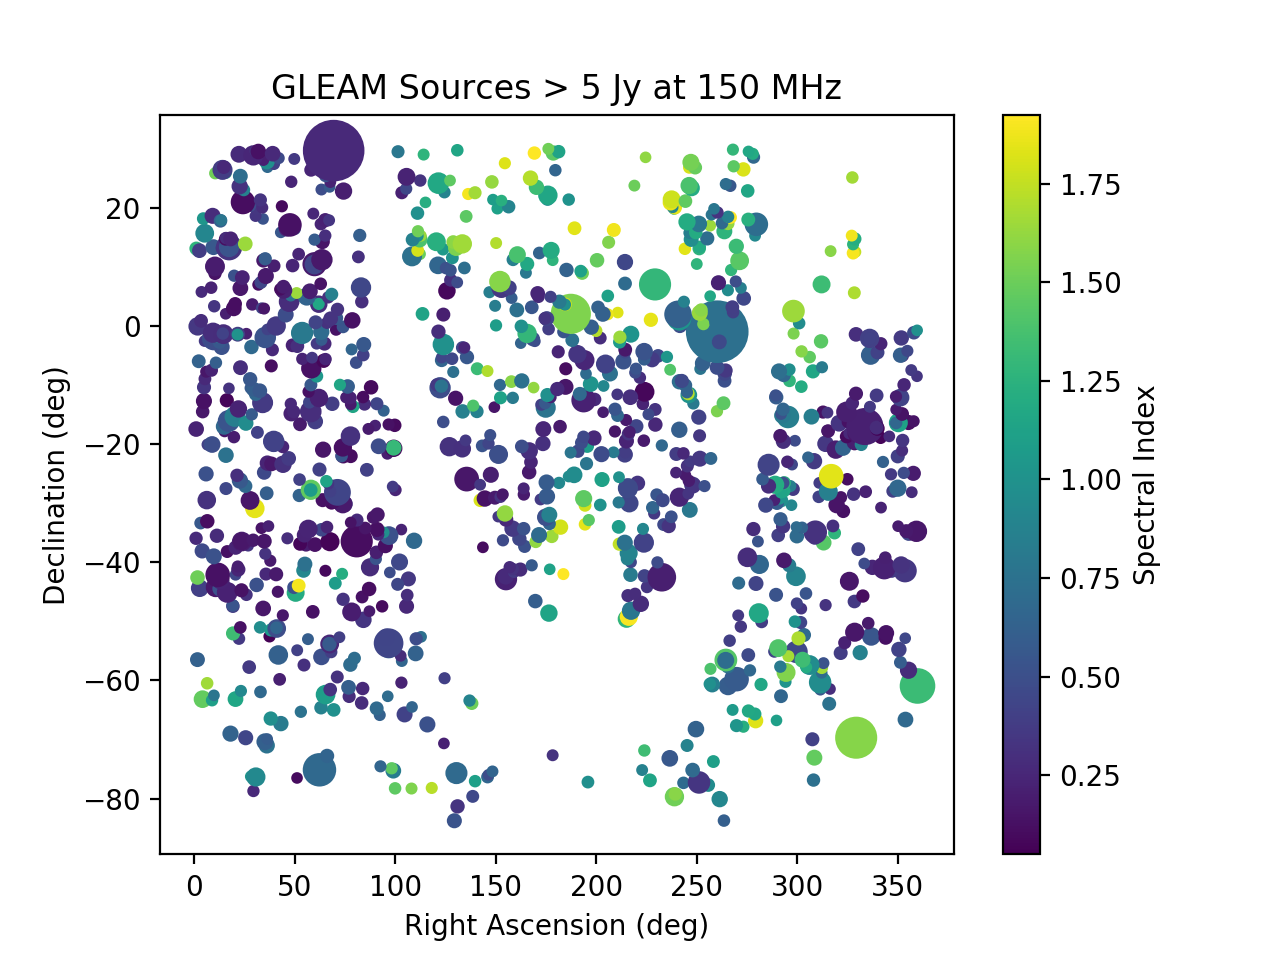

In [46]:
catalog = np.load('GLEAM_Catalog_150MHz.npz')
fLim = 5 #Jy
print(list(catalog.keys()))
fluxes = catalog['fluxes']
plt.figure()
plt.scatter(catalog['RAs'][fluxes>fLim], catalog['decs'][fluxes>fLim],
            s=2*fluxes[fluxes>fLim], c=catalog['spIndices'][fluxes>fLim])
#lw=0 removes the outlines, 2*fluxes makes the circles a bit easier to see

plt.title('GLEAM Sources > 5 Jy at 150 MHz')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
cbar = plt.colorbar(label='Spectral Index')

# CODING BREAKOUT: Plot the Global Sky Model as a function of frequency

In [47]:
map0 = np.load('GSM/GSM_NSIDE-64_Comp-0.npy')
map1 = np.load('GSM/GSM_NSIDE-64_Comp-1.npy')
map2 = np.load('GSM/GSM_NSIDE-64_Comp-2.npy')
comps = np.loadtxt('GSM/components.dat')
freqs = comps[:,0]
temps = comps[:,1]
W0, W1, W2 = comps[:,2], comps[:,3], comps[:,4]

In [48]:
from scipy.interpolate import interp1d

def GlobalSkyModel(f, maps, freqs, temps, weights):
    tempNormalization = np.exp(interp1d(np.log(freqs), np.log(temps), kind='cubic')(np.log(freq))) 
    #cubic spline interpolation in log(f), log(T)
    mapSum = 0
    for W,Map in zip(weights,maps):
        mapSum += interp1d(np.log(freqs), W, kind='cubic')(np.log(freq)) * Map  
        #cubic spline interpolation in log(f), weight
    return tempNormalization * mapSum

<IPython.core.display.Javascript object>


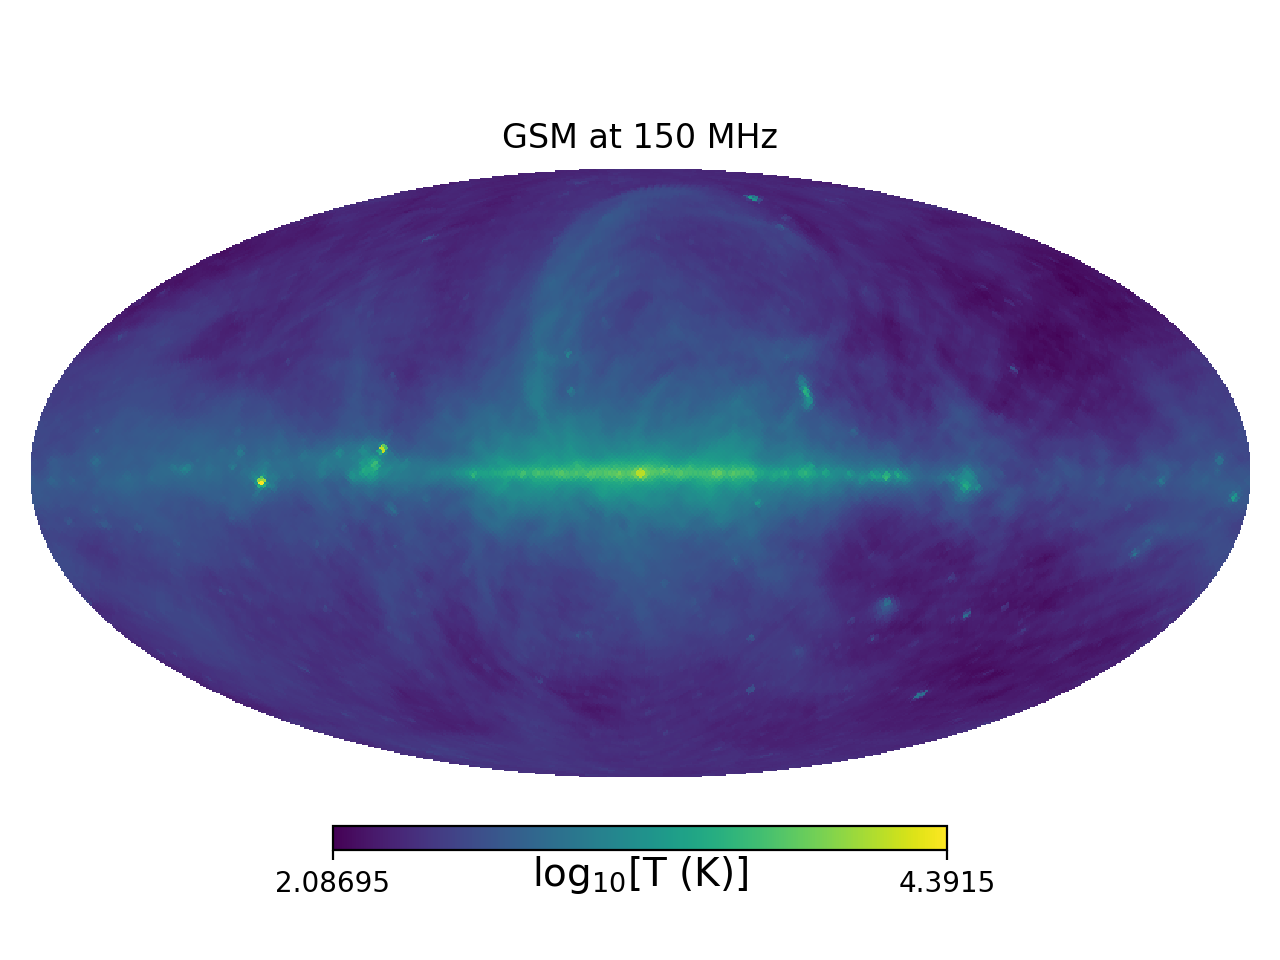

In [50]:
#Now plot it using it mollview
freq = 150 #MHz
GSM = GlobalSkyModel(freq, [map0, map1, map2], freqs, temps, [W0, W1, W2])
fig = plt.figure()
healpy.mollview(np.log10(GSM), fig=fig.number, title='GSM at '+str(freq)+' MHz', unit='log$_{10}$[T (K)]')